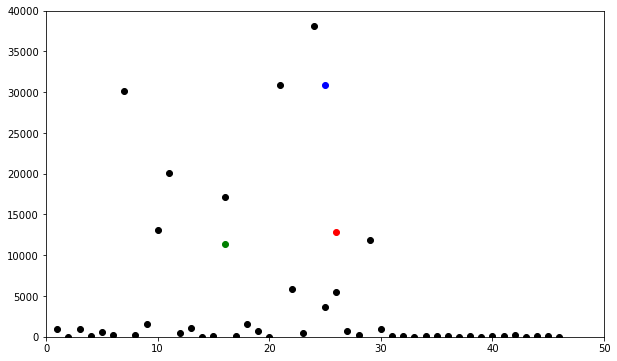

In [10]:
# Início

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46],
    'y':[991, 8, 994, 93, 640, 227, 30090, 214, 1535, 13090, 20079, 420, 1076, 2, 118, 17143, 43, 1615, 683, 34, 30825, 5854, 410, 38150, 3667, 5477, 715, 169, 11904, 904, 92, 111, 26, 90, 157, 73, 3, 136, 3, 90, 41, 212, 8, 52, 51, 32
]
})

np.random.seed(200)
k = 3
# Centroids [i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 50), np.random.randint(0, 40000)]
    for i in range(k)
}

fig = plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 50)
plt.ylim(0, 40000)
plt.show()

   x    y  distance_from_1  distance_from_2  distance_from_3  closest color
0  1  991     11914.026230     10352.010867     29948.009617        2     g
1  2    8     12897.022331     11335.008646     30931.008551        2     g
2  3  994     11911.022206     10349.008165     29945.008081        2     g
3  4   93     12812.018889     11250.006400     30846.007148        2     g
4  5  640     12265.017978     10703.005653     30299.006601        2     g


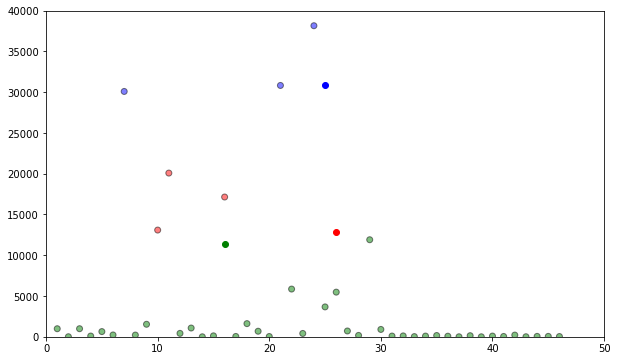

In [11]:
## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print (df.head())

fig = plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 50)
plt.ylim(0, 40000)
plt.show()

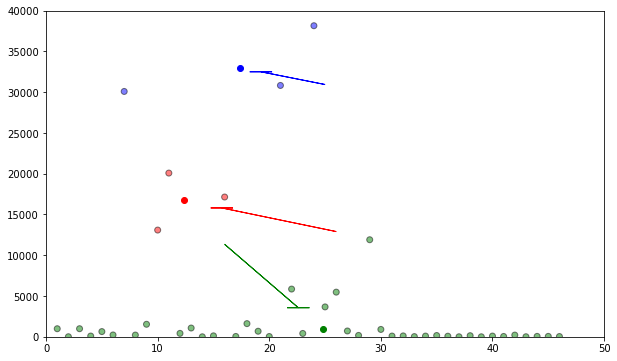

In [12]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 50)
plt.ylim(0, 40000)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

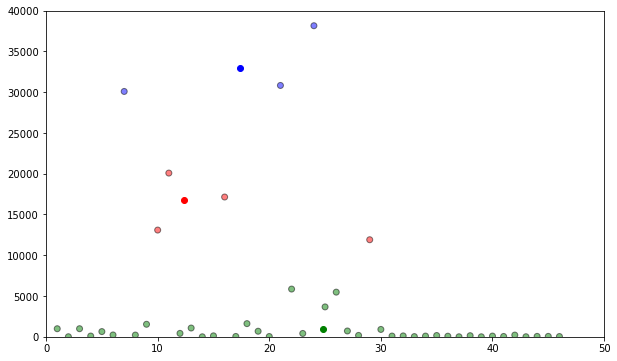

In [13]:
## Repeat Assignment Stage

df = assignment(df, centroids)

# Plot Results
fig = plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 50)
plt.ylim(0, 40000)
plt.show()

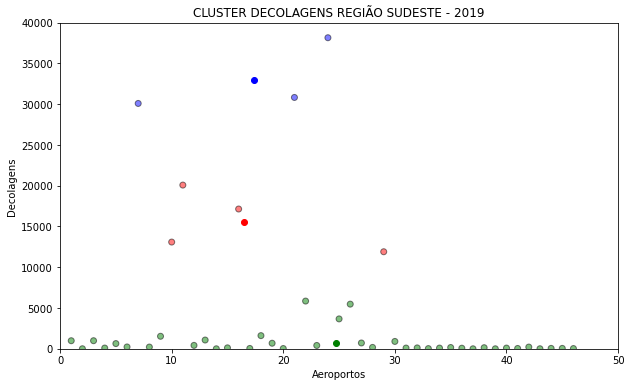

In [14]:
# Continue until all assigned categories don't change any more

while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
        
fig = plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])


plt.xlabel("Aeroportos")
plt.ylabel("Decolagens")
plt.title("CLUSTER DECOLAGENS REGIÃO SUDESTE - 2019")
    
plt.xlim(0, 50)
plt.ylim(0, 40000)

plt.show()



In [15]:
df = pd.DataFrame({
     'x':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46],
    'y':[991, 8, 994, 93, 640, 227, 30090, 214, 1535, 13090, 20079, 420, 1076, 2, 118, 17143, 43, 1615, 683, 34, 30825, 5854, 410, 38150, 3667, 5477, 715, 169, 11904, 904, 92, 111, 26, 90, 157, 73, 3, 136, 3, 90, 41, 212, 8, 52, 51, 32]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [19]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
